# Results of Computing F matrix

In [645]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from importlib import reload
import EightPoint
import graph_utils
reload(graph_utils)
reload(EightPoint)
from EightPoint import EightPoint
from processSequence import Sequence
from graph_utils import plot_epipolar_lines

## Get data

In [646]:
EPA = EightPoint()

# Load data
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Translation')
sequence = Sequence('./Reference_Render_cubes/Reference_Render_Rotation_and_Translations')

['./Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0001.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0002.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0003.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0004.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0005.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0006.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0007.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0008.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0009.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0010.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0011.png', './Reference_Render_cubes/Reference_Render_Rotation_a

## Find keypoints

In [647]:
im1 = sequence.images[0]
im2 = sequence.images[1]
pts1, pts2 = EPA.getMatchingPointsOpenCV(im1, im2)

In [648]:
print(len(pts1))

129


## Compute F using our algorithm

In [649]:

F, consensus = EPA.getFundamentalRANSAC(pts1, pts2)

F_cv, mask = cv2.findFundamentalMat(pts1, pts2, cv2.RANSAC, 1)

NORM 1.0045074692198186
NORM 1.0834660025298737
Best number of inliers: 124, outliers: 5
NORM 1.000953607840344
NORM 1.0165558490260027
Best number of inliers: 127, outliers: 2
NORM 1.0008065221081772
NORM 1.0649073908063837
NORM 1.000593819421565
NORM 1.0834660025298737
NORM 1.000021516242476
NORM 1.020442148746984
NORM 1.0068946709609528
NORM 1.01914342514888
NORM 1.00499813085591
NORM 1.1558606423029663
NORM 1.0035243955685687
NORM 1.0010878022878373
NORM 1.0027270914462887
NORM 1.1558606423029663
NORM 1.0082163861888318
NORM 1.012822648023901
NORM 1.0038256788611246
NORM 1.0639229560025698
NORM 1.002961646651461
NORM 1.0023084453818716
Best number of inliers: 128, outliers: 1
NORM 1.0047624339208072
NORM 1.020442148746984
NORM 1.3219736824156072
NORM 1.0024609339686743
NORM 1.002966407898015
Best number of inliers: 129, outliers: 0
NORM 1.000920035037689
NORM 1.0191805550488697
NORM 1.0029169615993916
NORM 1.0010878022878373
NORM 1.0027096686102859
NORM 1.0834660025298737
NORM 1.00

In [650]:
consensus

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]),)

In [651]:
number_of_pts = pts1.shape[0]
consensus_set = np.arange(0, number_of_pts)
consensus_set = np.isin(consensus_set, consensus)
print(sum(consensus_set))
print(sum(mask))
consensus_set



129
[84]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [652]:
sum(consensus_set - np.squeeze(mask)==1)

np.int64(45)

In [653]:
consensus_pts1 = pts1[consensus_set]
consensus_pts2 = pts2[consensus_set]



In [654]:
print(F)
print(F_cv)

[[ 6.14589562e-07  4.61405621e-05 -2.55109777e-02]
 [-4.61276735e-05  1.45235888e-06  4.77812156e-02]
 [ 2.42322983e-02 -4.91991086e-02  1.00000000e+00]]
[[ 4.75853284e-07  3.38670729e-05 -1.76112154e-02]
 [-3.40970472e-05  1.00697397e-06  6.95019247e-02]
 [ 1.62934877e-02 -7.01357061e-02  1.00000000e+00]]


## Compare the F we calculated with F calculated from our Ransac Consensus Points on opencv's cv2.findFundamentalMat(masked_pts1, masked_pts2, cv2.FM_8POINT)

In [655]:
def __getNormalizingMatrix(pts):
    # Normalize points
    ptsMean = np.mean(pts, axis=0)
    ptsCentered = pts - ptsMean
    ptsStd = np.sqrt(np.sum(np.sum(ptsCentered ** 2, axis=1))/(2*len(pts)))
    M = np.array([[1/ptsStd, 0, 0],
                [0, 1/ptsStd, 0],
                [0, 0, 1]]) @ np.array([[1, 0, -ptsMean[0]],
                                        [0, 1, -ptsMean[1]],
                                        [0, 0, 1]])
    return M





masked_pts1= pts1[np.squeeze(mask)==1]#consensus_pts1
masked_pts2 = pts2[np.squeeze(mask)==1]#consensus_pts2
# masked_pts1= consensus_pts1
# masked_pts2 = consensus_pts2


F_masked, _ = cv2.findFundamentalMat(masked_pts1, masked_pts2, cv2.FM_8POINT)
# F_masked = M2.T @ F_masked_normalized @ M1

masked_pts1_hom = np.hstack((masked_pts1, np.ones((masked_pts1.shape[0], 1))))
masked_pts2_hom = np.hstack((masked_pts2, np.ones((masked_pts2.shape[0], 1))))
error = np.abs(np.sum(masked_pts2_hom * (F_cv @ masked_pts1_hom.T).T, axis=1))
# np.abs(np.masked_pts1_hom @ (F_masked @ masked_pts2_hom.T), axis=1))



In [656]:
print(F_masked)
# print(F)#)/np.linalg.norm(F))
# print(F_masked/np.linalg.norm(F_masked))
print(F)

[[ 3.21993430e-07  2.11570703e-05 -1.60082523e-02]
 [-2.13268135e-05  2.42697645e-07  7.27581654e-02]
 [ 1.47231374e-02 -7.28748389e-02  1.00000000e+00]]
[[ 6.14589562e-07  4.61405621e-05 -2.55109777e-02]
 [-4.61276735e-05  1.45235888e-06  4.77812156e-02]
 [ 2.42322983e-02 -4.91991086e-02  1.00000000e+00]]


In [657]:
F2 = EPA.getFundementalLS(masked_pts1, masked_pts2)
print(F2)
F_masked_our_points = EPA.getFundementalLS(consensus_pts1, consensus_pts2)

NORM 1.005445402736772
[[ 3.33113587e-07  2.20274998e-05 -1.61857214e-02]
 [-2.21920095e-05  2.87534418e-07  7.21591841e-02]
 [ 1.48972122e-02 -7.23160048e-02  1.00000000e+00]]
NORM 1.002966407898015


[[ 0.  0. -0.]
 [-0.  0.  0.]
 [ 0. -0.  0.]]


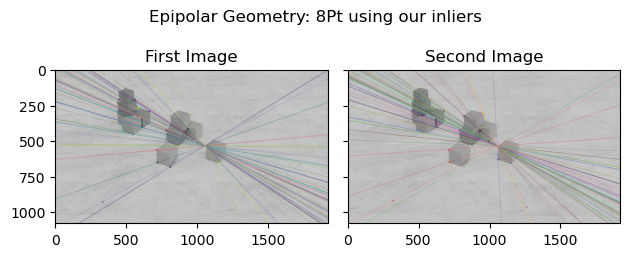

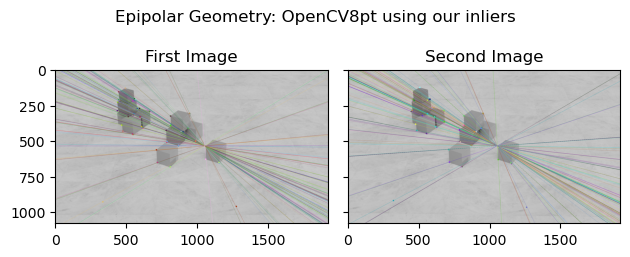

In [658]:
plot_epipolar_lines(im1, im2, pts1=consensus_pts1, pts2=consensus_pts2, F=F, title= ": 8Pt using our inliers")
plot_epipolar_lines(im1, im2, pts1=consensus_pts1, pts2=consensus_pts2, F=F_masked_our_points, title= ": OpenCV8pt using our inliers")
print(np.divide(abs(F-F_masked_our_points), F_masked_our_points))

f2 : [[ 3.33113587e-07  2.20274998e-05 -1.61857214e-02]
 [-2.21920095e-05  2.87534418e-07  7.21591841e-02]
 [ 1.48972122e-02 -7.23160048e-02  1.00000000e+00]]
F masked : [[ 3.21993430e-07  2.11570703e-05 -1.60082523e-02]
 [-2.13268135e-05  2.42697645e-07  7.27581654e-02]
 [ 1.47231374e-02 -7.28748389e-02  1.00000000e+00]]
[[ 3.46157196e-02  4.12221859e-02 -1.11646491e-02]
 [-4.06492961e-02  1.84835371e-01  8.15545177e-03]
 [ 1.19018146e-02 -7.59132069e-03  7.76839586e-05]]


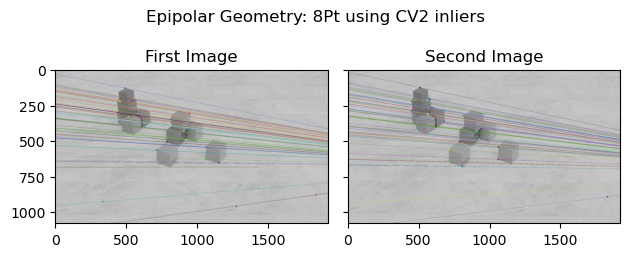

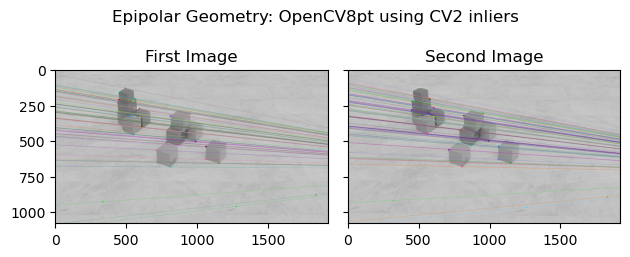

In [659]:
print(f"f2 : {F2}")
print(f"F masked : {F_masked}")
plot_epipolar_lines(im1, im2, pts1=consensus_pts1, pts2=consensus_pts2, F=F2, title= ": 8Pt using CV2 inliers")
plot_epipolar_lines(im1, im2, pts1=consensus_pts1, pts2=consensus_pts2, F=F_masked, title= ": OpenCV8pt using CV2 inliers")
print(np.divide(abs(F2/np.linalg.norm(F2)-F_masked/np.linalg.norm(F_masked)), F_masked/np.linalg.norm(F_masked)))

In [660]:
def error_in_F(F_ours, F_cv):
    # Normalize then compute error
    return abs(np.divide(F_ours - F_cv, F_cv))
    #return np.divide(abs(F_ours/np.linalg.norm(F_ours) - F_cv/np.linalg.norm(F_cv)), F_cv/np.linalg.norm(F_cv))

In [661]:
def compute_error(pts1, pts2, use_cv_points = False):
    # Find points using our ransac or opencv's
    if use_cv_points:
        F_cv, mask = cv2.findFundamentalMat(pts1, pts2, cv2.RANSAC, 1)
        masked_pts1= pts1[np.squeeze(mask)==1]#consensus_pts1
        masked_pts2 = pts2[np.squeeze(mask)==1]#consensus_pts2

    else: 
        F, consensus = EPA.getFundamentalRANSAC(pts1, pts2)
        number_of_pts = pts1.shape[0]
        consensus_set = np.arange(0, number_of_pts)
        consensus_set = np.isin(consensus_set, consensus)
        consensus_pts1 = pts1[consensus_set]
        consensus_pts2 = pts2[consensus_set]
        masked_pts1= consensus_pts1
        masked_pts2 = consensus_pts2

    # Compute F using our algo
    F_ours = EPA.getFundementalLS(masked_pts1, masked_pts2)
    # Compute F using open CV
    F_cv, _ = cv2.findFundamentalMat(masked_pts1, masked_pts2, cv2.FM_8POINT)

    return error_in_F(F_ours, F_cv)

In [662]:
compute_error(pts1, pts2, True)

NORM 1.005445402736772


array([[0.03453535, 0.04114131, 0.0110861 ],
       [0.04056846, 0.18474334, 0.0082325 ],
       [0.01182321, 0.00766841, 0.        ]])

### Compute 8point algorithm error

In [ ]:
EPA = EightPoint()
# Load data
sequence = Sequence('./Reference_Render_cubes/Reference_Render_Translation')
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Rotation_and_Translations')
error = []
for i in range(len(sequence.images) -1):
    im1 = sequence.images[i]
    im2 = sequence.images[i+1]
    pts1, pts2 = EPA.getMatchingPointsOpenCV(im1, im2)

    error.append((compute_error(pts1, pts2, True)))
print(np.array(error).mean(axis=0))

['./Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0001.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0002.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0003.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0004.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0005.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0006.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0007.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0008.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0009.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0010.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0011.png', './Reference_Render_cubes/Reference_Render_Rotation_a

In [ ]:
EPA = EightPoint()
# Load data
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Translation')
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Rotation_and_Translations')
error = []
for i in range(len(sequence.images) -1):
    im1 = sequence.images[i]
    im2 = sequence.images[i+1]
    pts1, pts2 = EPA.getMatchingPointsOpenCV(im1, im2)

    error.append((compute_error(pts1, pts2, True)))
print(np.array(error).mean(axis=0))